## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# **<p style="color:Orange;">Project:</p>**
## <p style="color:#3498db;">Shopping Trends & Customer Behaviour Analysis</p>

# **<p style="color:#3498db;">🛍️ Project: Shopping Trends & Customer Behavior Analysis**
## **<p style="color:Red;">✨ Goal:**
###  <p style="color:Orange;"> To uncover insights from consumer shopping data — exploring trends, behaviors, and patterns that could inform marketing or business strategy.

In [2]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Shopping Trends And Customer Behaviour Dataset.csv")

## Data Handling & Cleaning 

In [3]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [4]:
df.drop(columns=["Unnamed: 0"],inplace=True) # Dropping Column For A Clean Dataset

In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
df["Subscription Status"].value_counts()
df["Subscription Status"]=df["Subscription Status"].replace({"Yes":1,"No":0}).astype("int64") # Converting Column Data Type and Replacing Value, yes=1 & No=0 

C:\Users\user\AppData\Local\Temp\ipykernel_14480\904675589.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Subscription Status"]=df["Subscription Status"].replace({"Yes":1,"No":0}).astype("int64") # Converting Column Data Type and Replacing Value, yes=1 & No=0


In [7]:
df["Shipping Type"].value_counts()
df.drop(columns=["Shipping Type"],inplace=True)

In [8]:
df.shape

(3900, 16)

## EDA & Visualization

### `Which Item Purchased By Most & In Which Category`

## **<p style="color:Green;">Gender classification based on different types of purchase making decisions,behaviour and frequency.**
### *<p style="color:#3498db;">In this way we can follow the Gender analysis pattern, which type of gender has which type of criteria to buy which types of product and also how freqent they are or how their decision making ability convince them to buy a product. This visualization analysis shows and helps us to understand the customer and their behaviour and pattern when they purchase a product.*

<Figure size 1200x600 with 0 Axes>

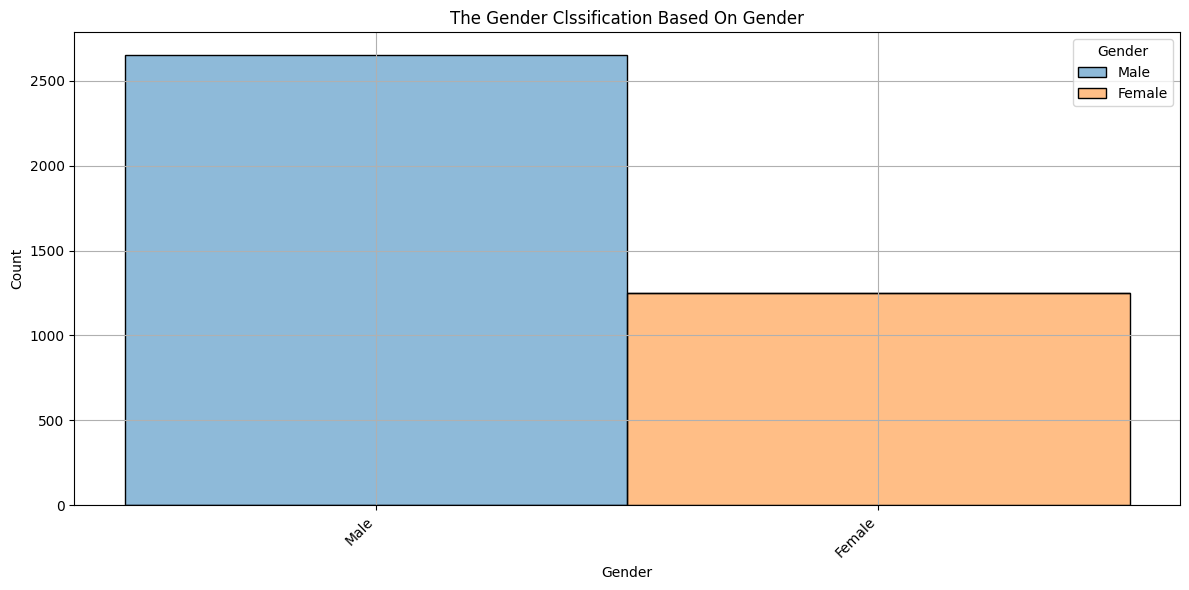

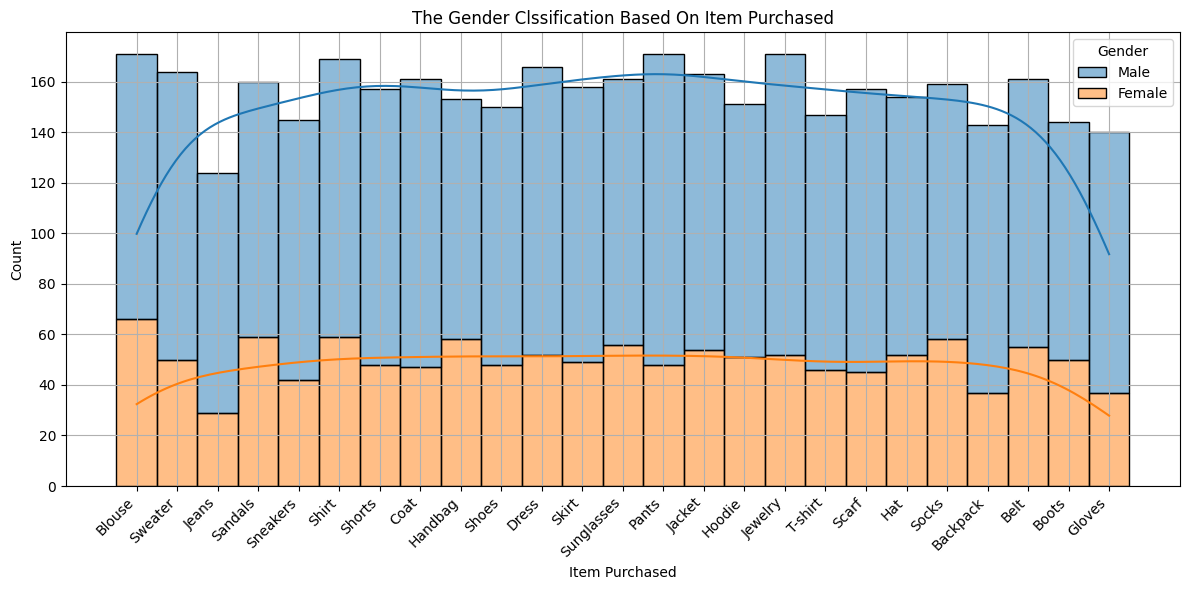

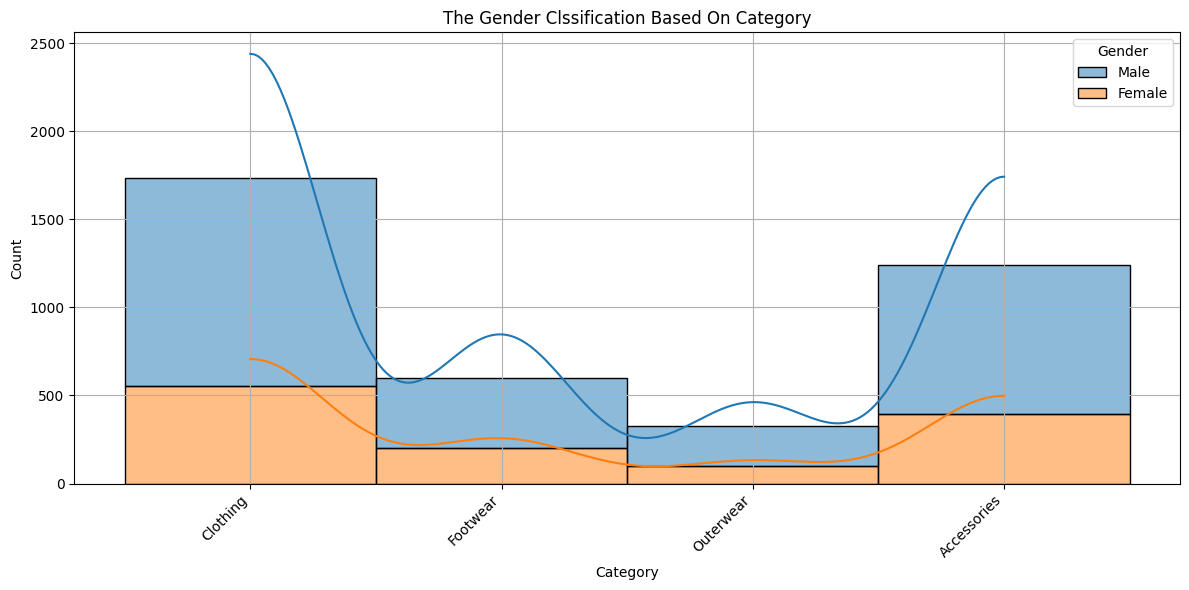

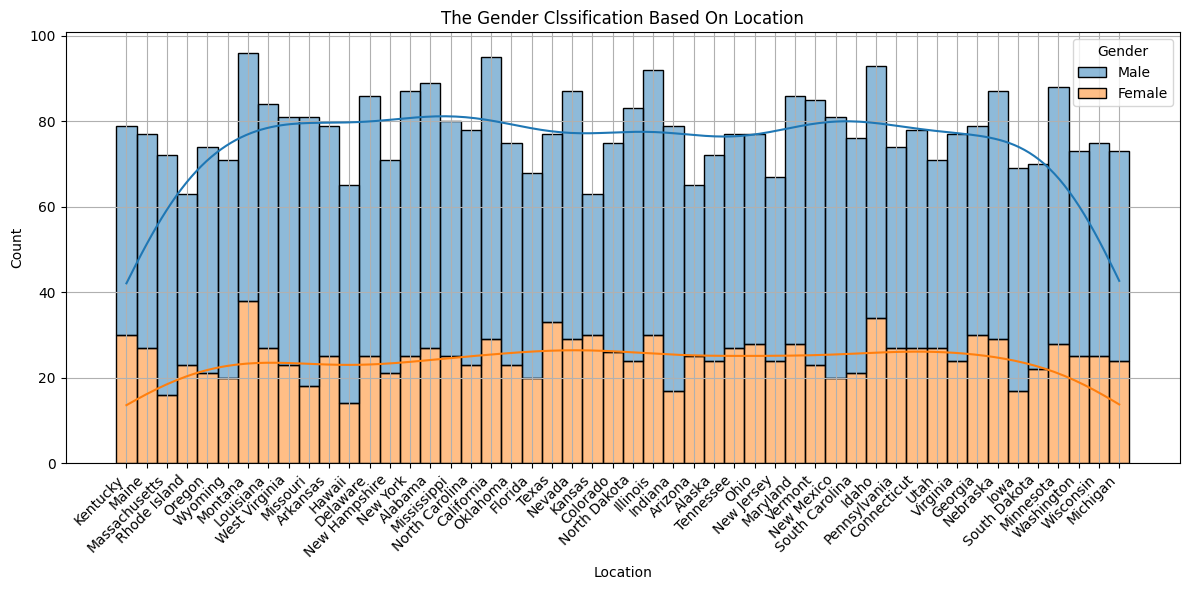

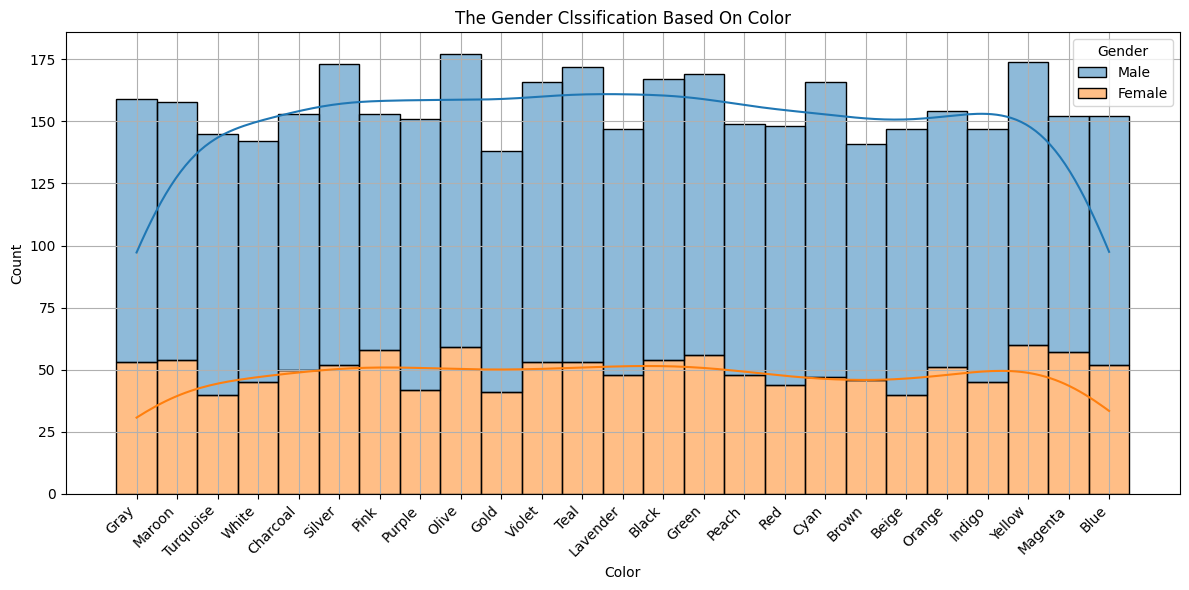

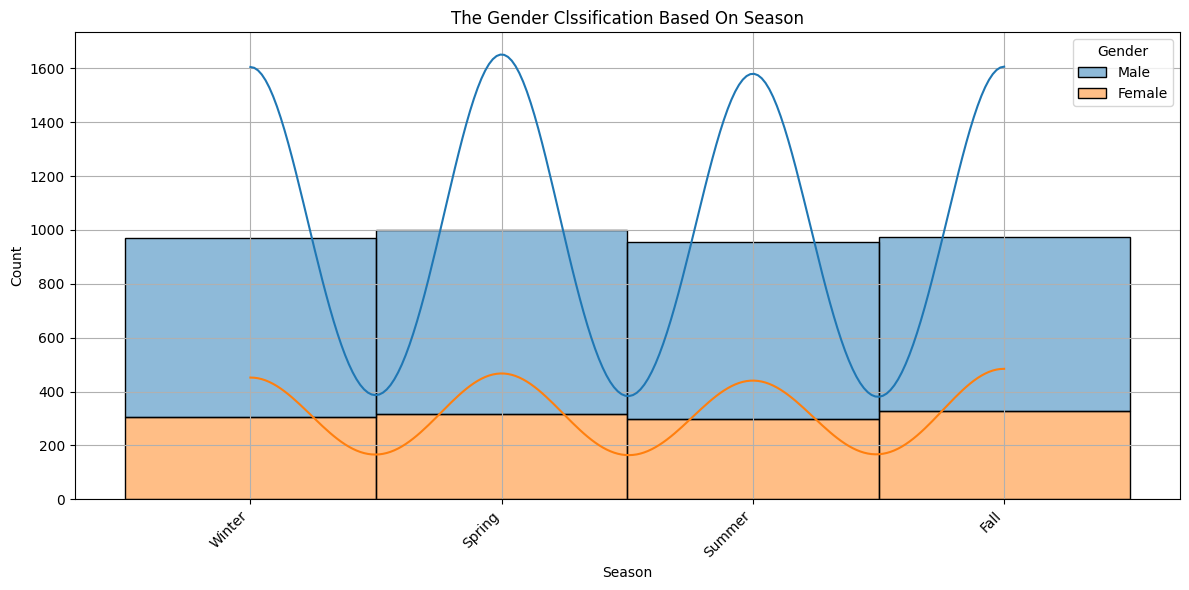

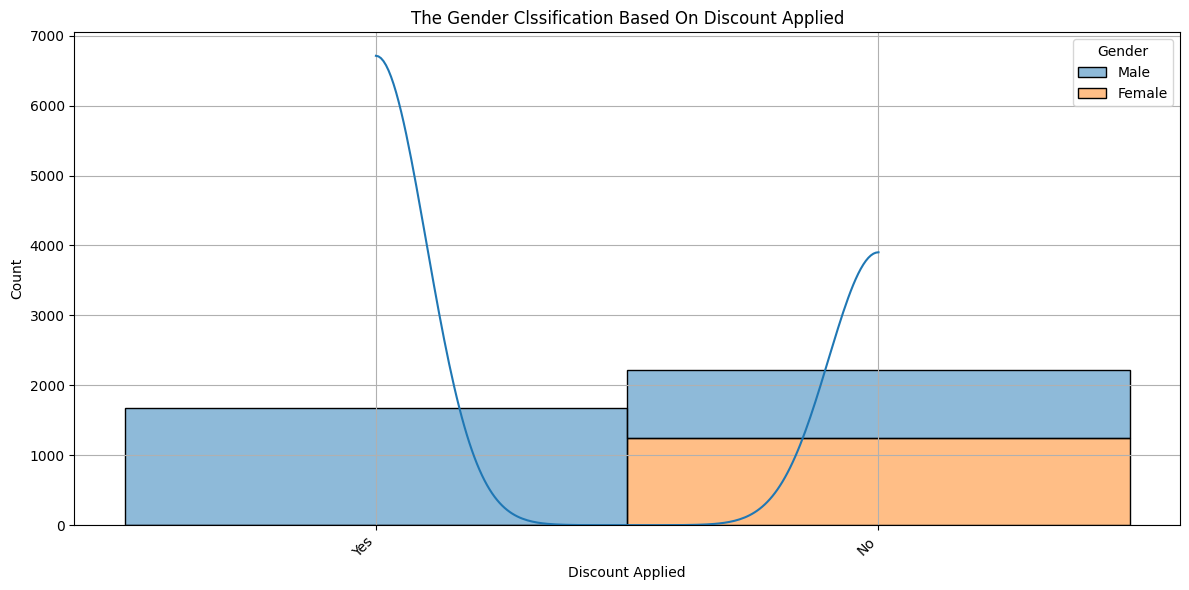

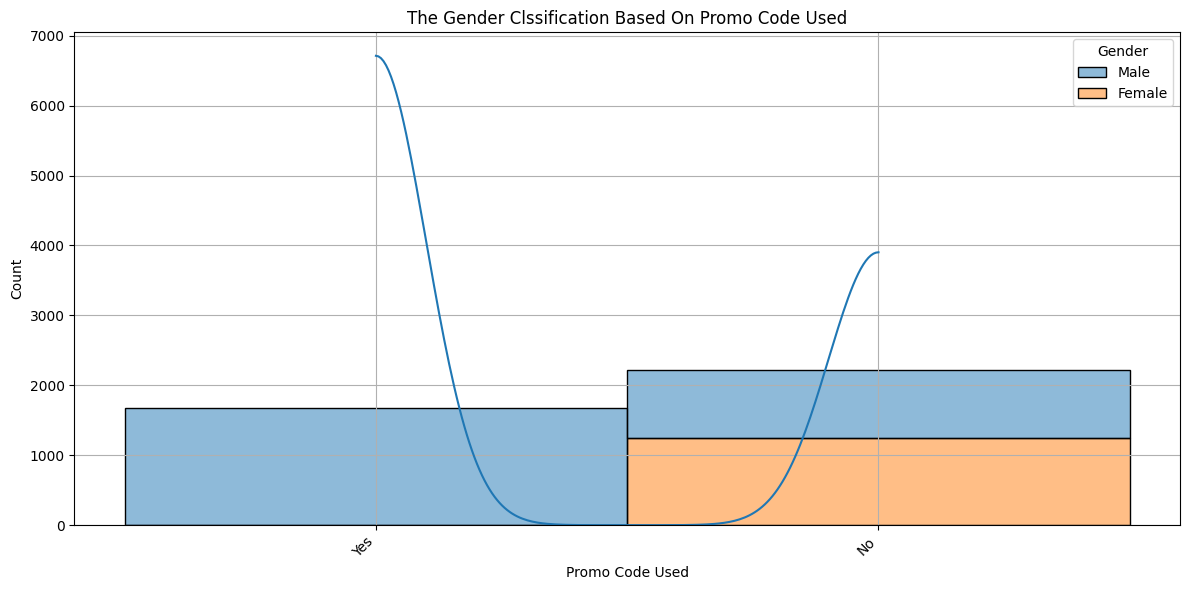

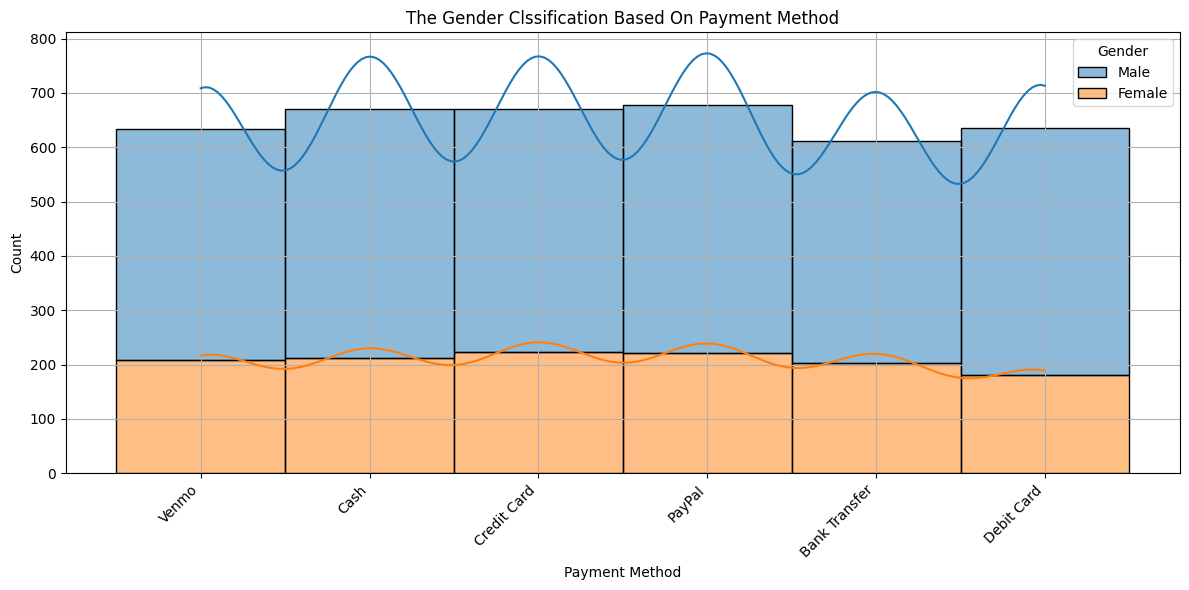

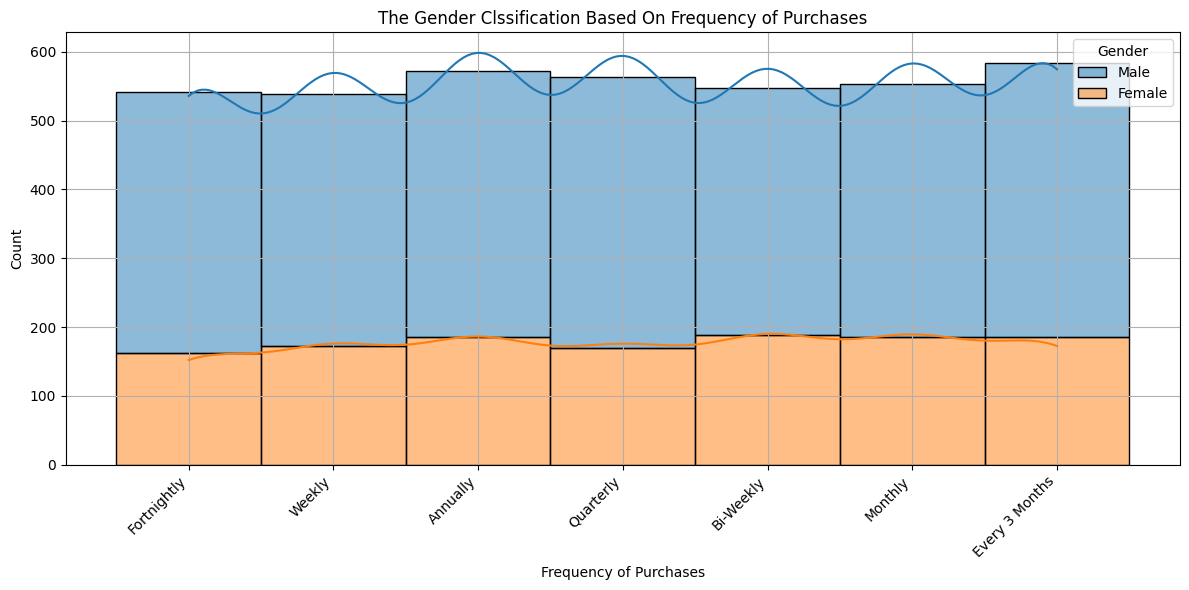

In [9]:
col=df.select_dtypes(include=["object"]).columns
plt.figure(figsize=(12,6))
for cols in col:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=cols,kde=True,bins=30,hue="Gender",multiple="stack")
    plt.title(f"The Gender Clssification Based On {cols}")
    plt.grid(True)
    plt.xticks(rotation=45,ha="right")
    plt.tight_layout()
    plt.show()

In [10]:
classifi_pur=df.groupby(["Gender","Item Purchased","Category"])["Purchase Amount (USD)"].sum().reset_index().sort_values("Purchase Amount (USD)",ascending=False)
classifi_pur.style.background_gradient(cmap="Reds")

,Gender,Item Purchased,Category,Purchase Amount (USD)
38,Male,Pants,Clothing,7154
40,Male,Scarf,Accessories,6859
30,Male,Dress,Clothing,6828
41,Male,Shirt,Clothing,6780
37,Male,Jewelry,Accessories,6639
43,Male,Shorts,Clothing,6636
48,Male,Sweater,Clothing,6539
49,Male,T-shirt,Clothing,6531
29,Male,Coat,Outerwear,6428
26,Male,Belt,Accessories,6426


In [11]:
plt.figure(figsize=(15,8))
fig=px.bar(classifi_pur,x="Category",y="Purchase Amount (USD)", color="Gender",color_discrete_sequence=["#FFA15A", "#FF6692"])
fig.show()


<Figure size 1500x800 with 0 Axes>

In [12]:
loc_counts=df.groupby("Location").size().sort_values(ascending=False)
top_location=loc_counts.idxmax()
top_count=loc_counts.max()
print(f"Location with the highest number of purchases: {top_location} ({top_count})")

Location with the highest number of purchases: Montana (96)


#### *<p style="color:#FFA15A;">Location with the highest number of purchases: Montana (96)*

### `Classification Of Gender, How Frequent They Purchase From Which Location And How Much They Have Spent`

In [13]:
classifi_lo=df.groupby(["Gender","Location","Frequency of Purchases"])["Purchase Amount (USD)"].sum().reset_index().sort_values("Purchase Amount (USD)",ascending=False)
classifi_lo

,Gender,Location,Frequency of Purchases,Purchase Amount (USD)
517,Male,Missouri,Quarterly,1199
429,Male,Illinois,Bi-Weekly,995
657,Male,Vermont,Quarterly,907
496,Male,Michigan,Quarterly,904
524,Male,Montana,Quarterly,896
...,...,...,...,...
201,Female,New Jersey,Every 3 Months,29
633,Male,Tennessee,Every 3 Months,26
4,Female,Alabama,Monthly,24
343,Female,Wyoming,Weekly,22


### `How Frequent They Are With Their Purchase`

In [14]:
classifi_lo=df.groupby(["Gender","Location","Frequency of Purchases"]).size().unstack()
classifi_lo
# Sum across frequencies to get total count per Gender + Location
total_counts = classifi_lo.sum(axis=1)

# Find the index (i.e., Gender + Location) with the highest total
top_combination = total_counts.idxmax()
top_value = total_counts.max()

print(f"Most frequent Gender + Location combo: {top_combination} ({top_value} purchases)")

Most frequent Gender + Location combo: ('Male', 'California') (66.0 purchases)


#### *<p style="color:#FECB52 ;">From this analysis we can notice the most frequent customer from Male category is from California with 66.0 purchases*

In [15]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,1,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,1,Yes,Yes,31,PayPal,Annually


### `Classification By Gender And Age To Notice The Average Rating Review And Highest Previous Purchases`

<Figure size 1200x600 with 0 Axes>

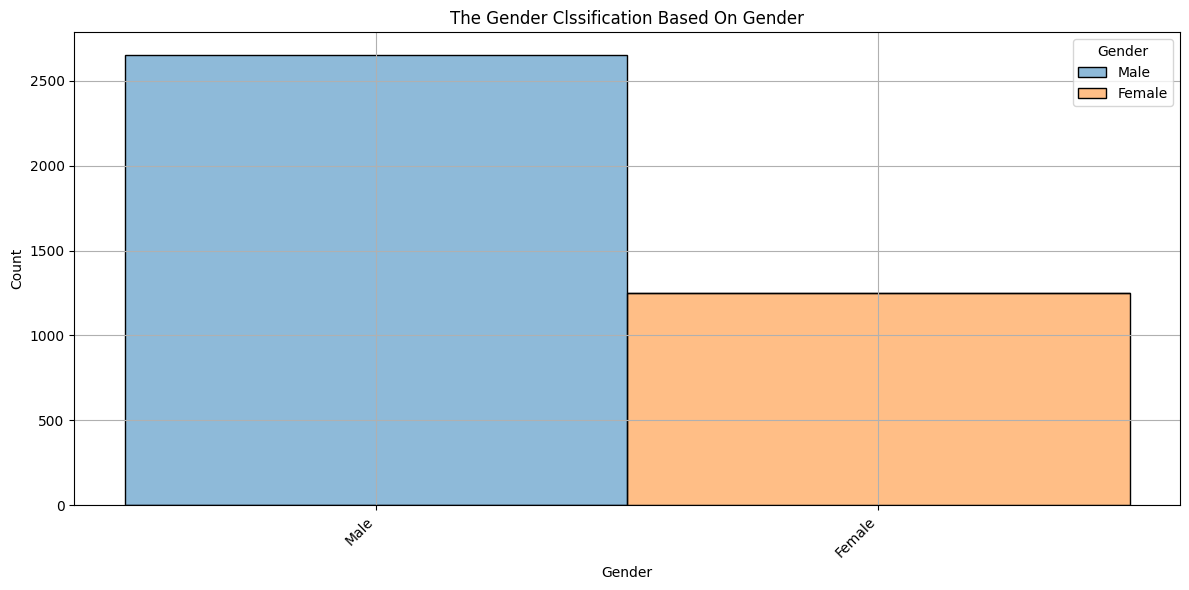

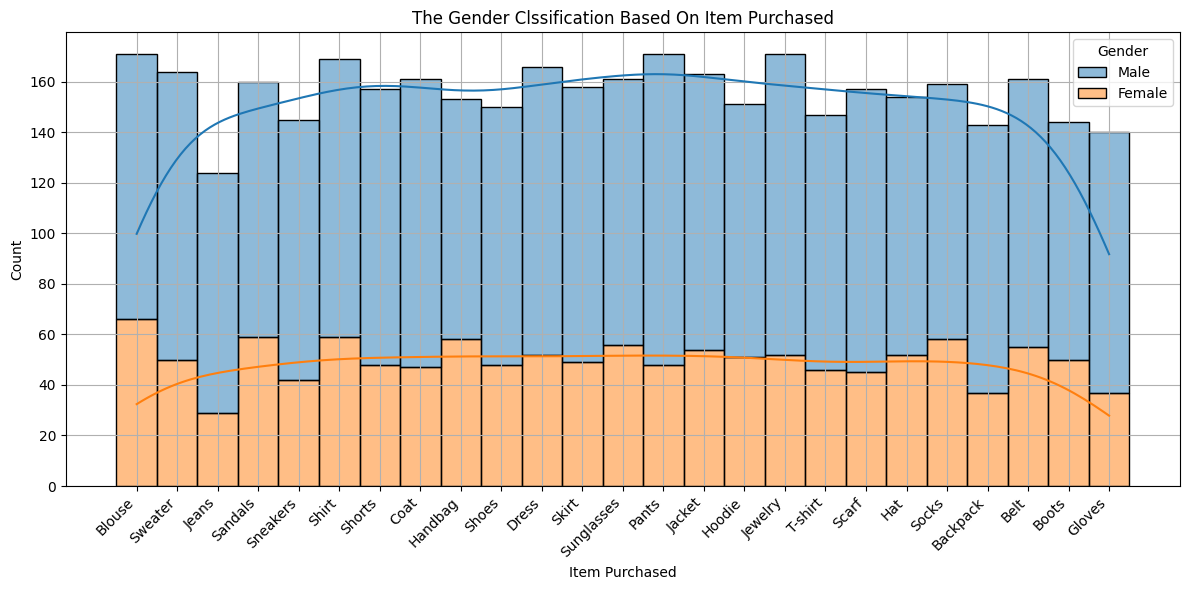

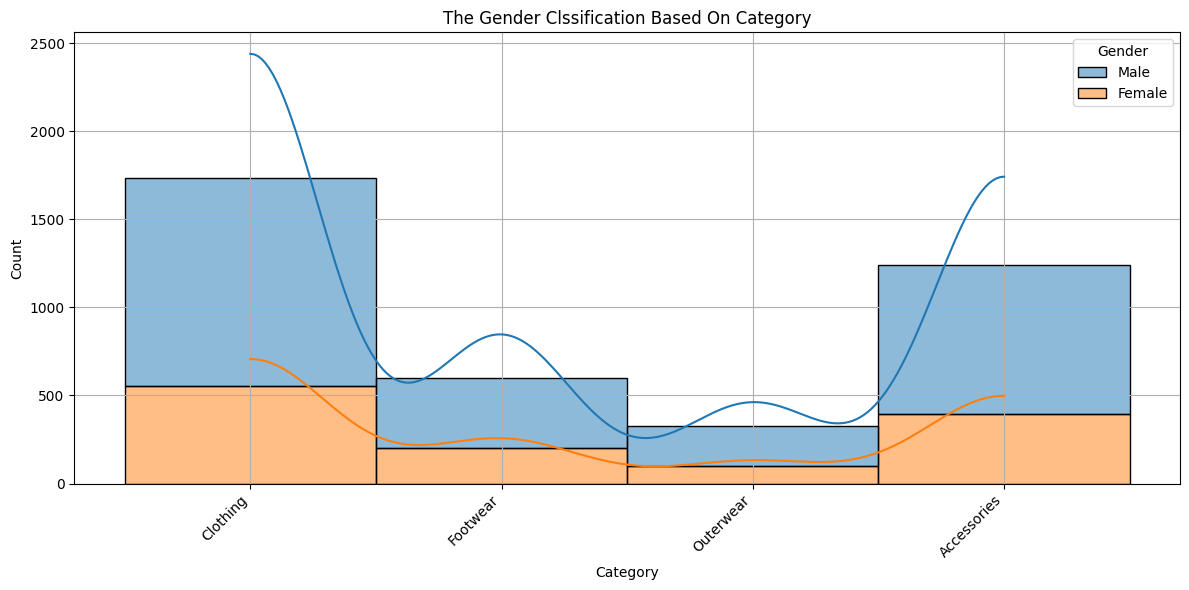

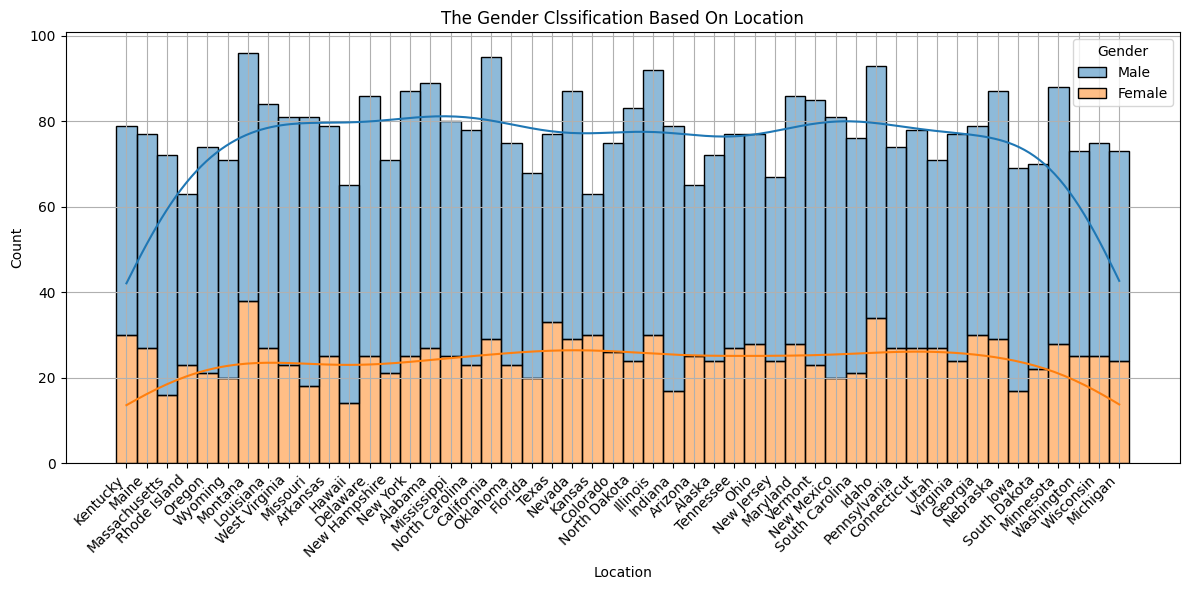

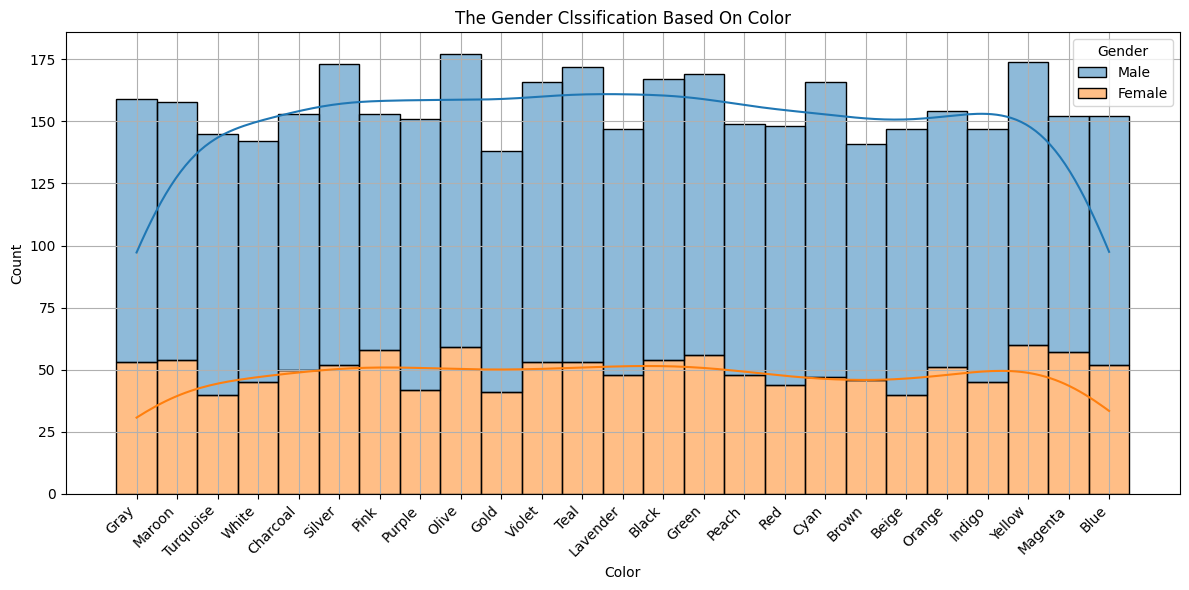

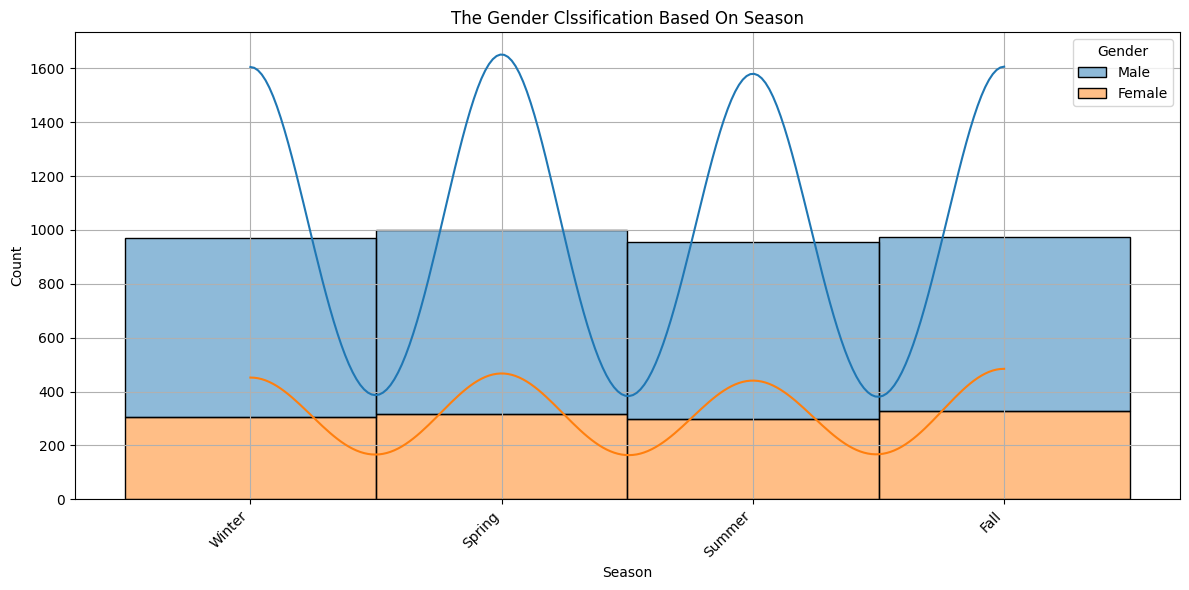

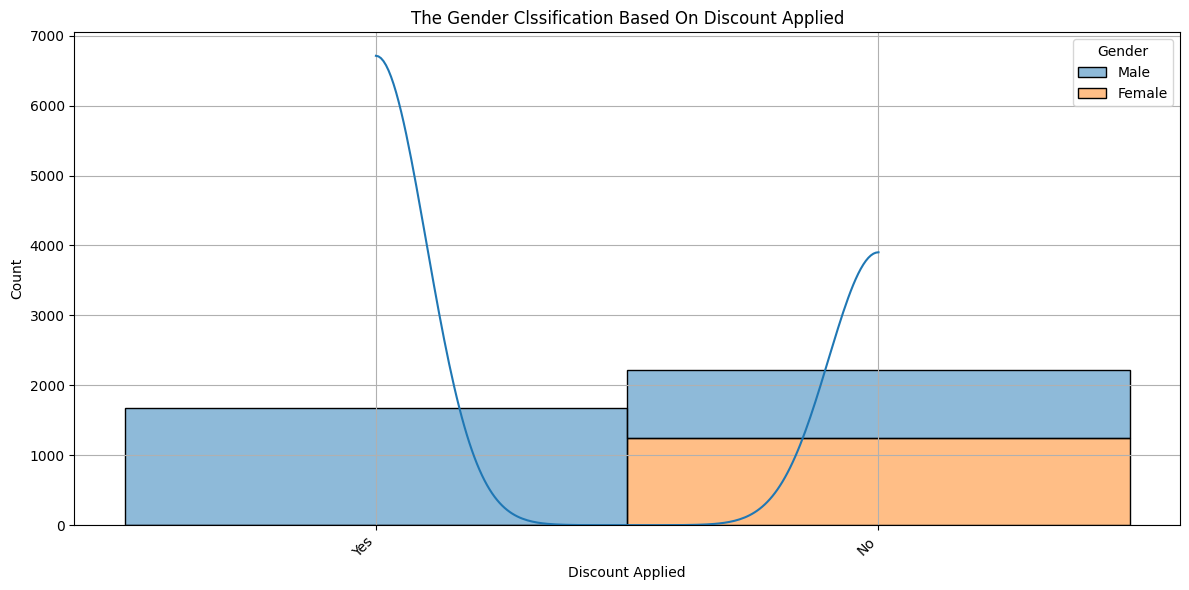

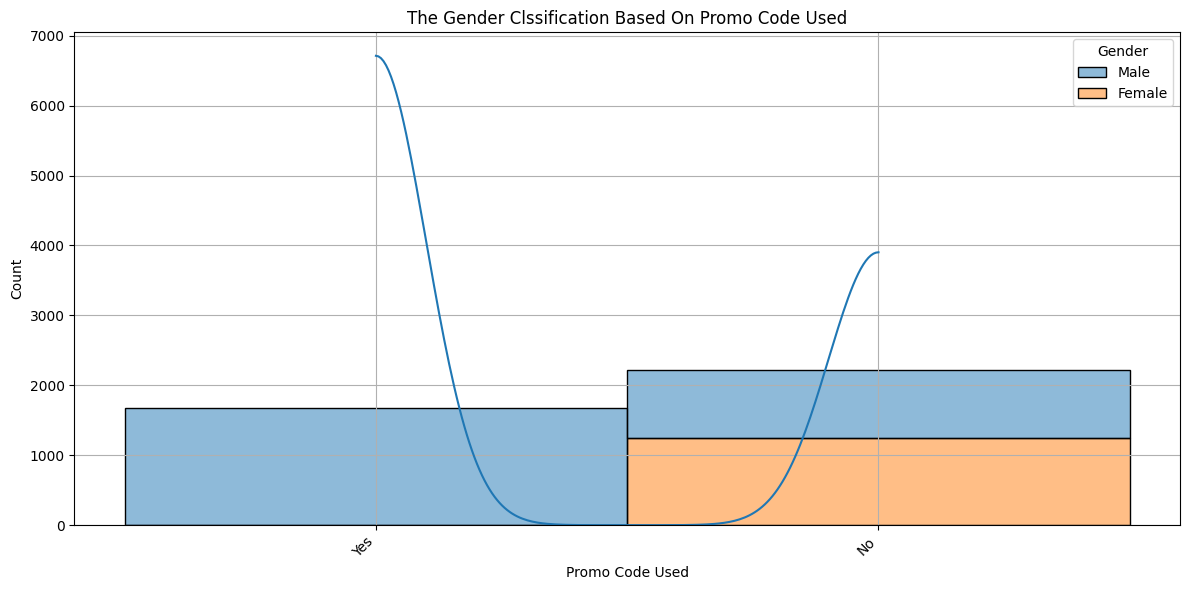

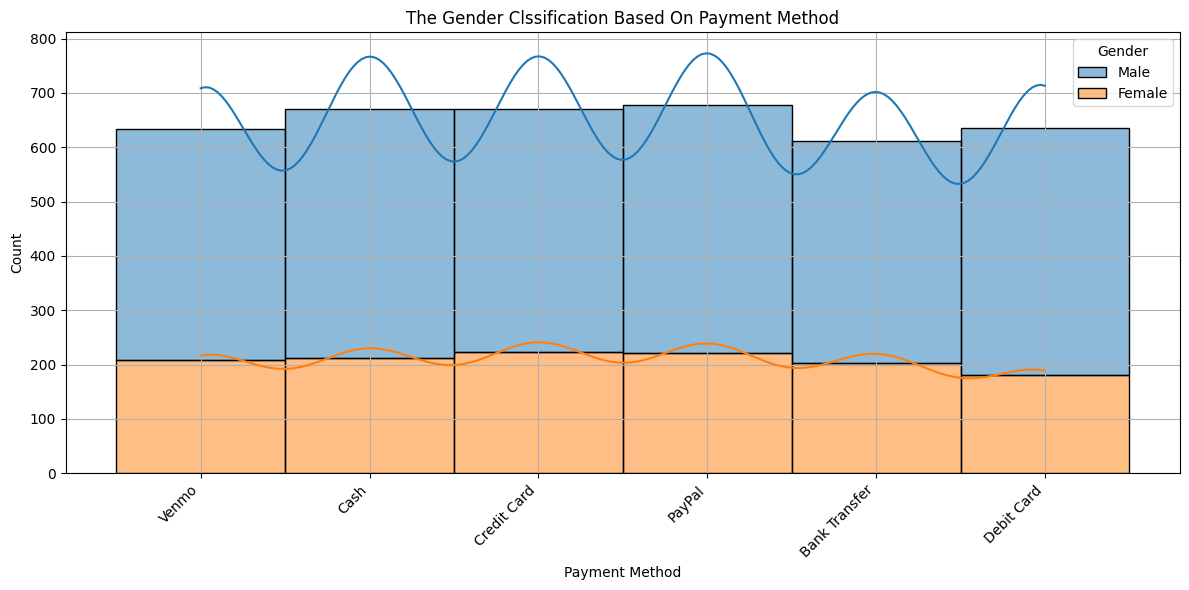

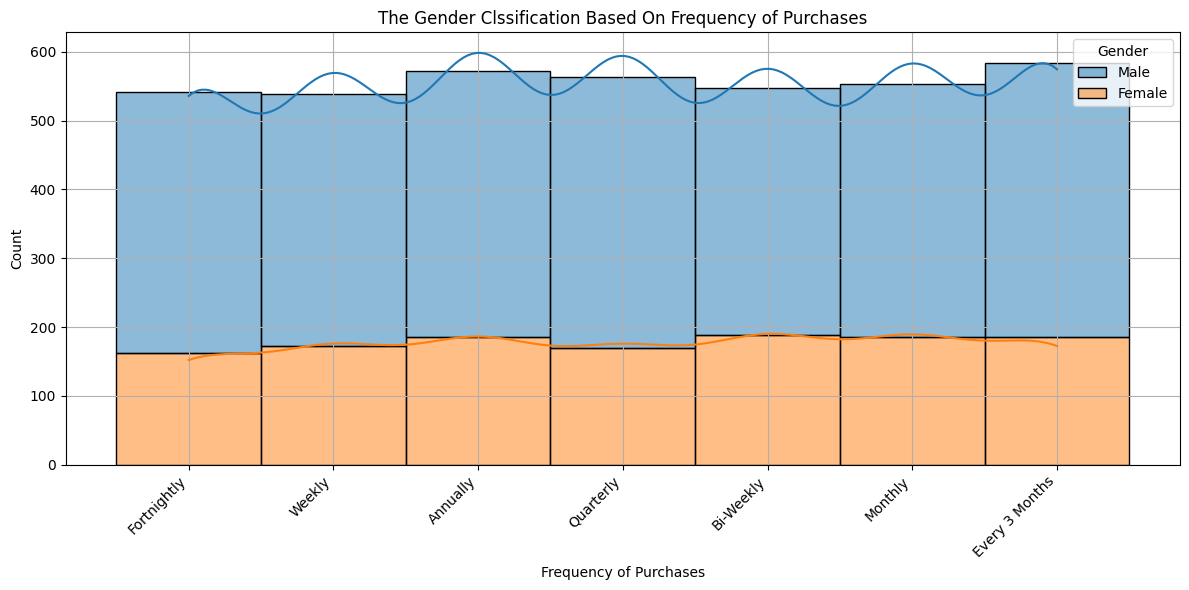

In [16]:
col=df.select_dtypes(include=["object"]).columns
plt.figure(figsize=(12,6))
for cols in col:
    plt.figure(figsize=(12,6))
    sns.histplot(data=df,x=cols,kde=True,bins=30,hue="Gender",multiple="stack")
    plt.title(f"The Gender Clssification Based On {cols}")
    plt.grid(True)
    plt.xticks(rotation=45,ha="right")
    plt.tight_layout()
    plt.show()

In [17]:
classifi_age=df.groupby(["Gender","Category","Item Purchased","Payment Method"]).agg({
    "Age":"mean",
    "Review Rating":"mean",
    "Previous Purchases":"sum"
}).reset_index()
classifi_age=classifi_age.sort_values("Previous Purchases",ascending=False)
classifi_age.head(25).style.background_gradient(cmap="Oranges")

,Gender,Category,Item Purchased,Payment Method,Age,Review Rating,Previous Purchases
185,Male,Accessories,Jewelry,Venmo,43.208333,3.608333,743
181,Male,Accessories,Jewelry,Cash,50.250000,3.740000,690
200,Male,Clothing,Blouse,Credit Card,48.391304,3.656522,686
291,Male,Outerwear,Coat,Debit Card,50.714286,3.795238,679
172,Male,Accessories,Handbag,PayPal,41.772727,3.481818,674
206,Male,Clothing,Dress,Credit Card,43.142857,3.704762,652
267,Male,Footwear,Boots,Debit Card,50.000000,3.658333,637
157,Male,Accessories,Belt,Cash,38.826087,3.886957,633
190,Male,Accessories,Scarf,PayPal,42.500000,3.583333,628
184,Male,Accessories,Jewelry,PayPal,45.105263,3.842105,620


<Figure size 1500x600 with 0 Axes>

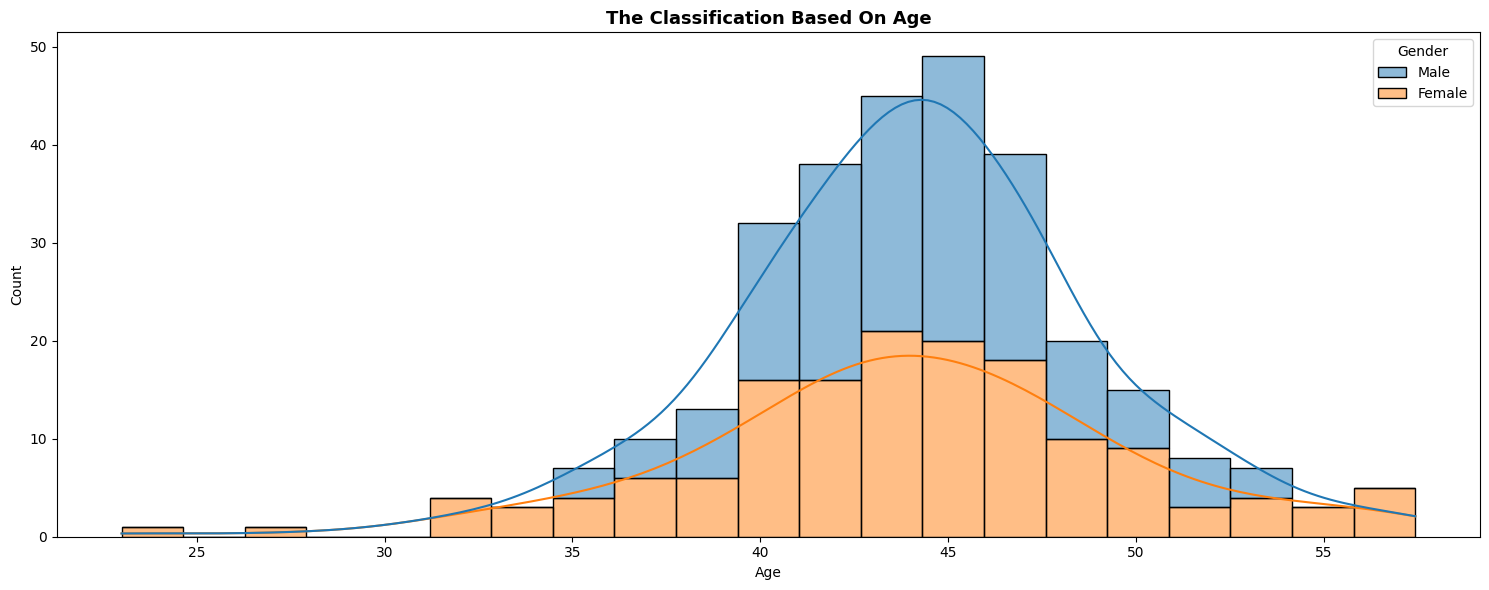

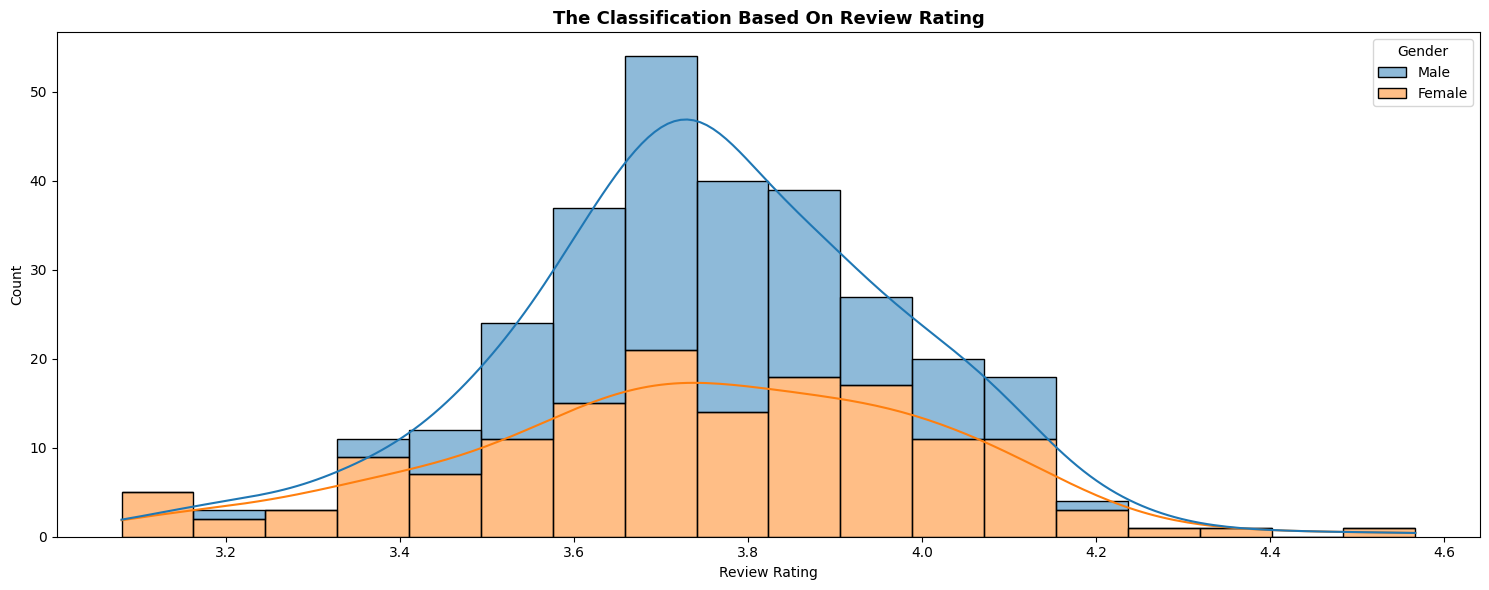

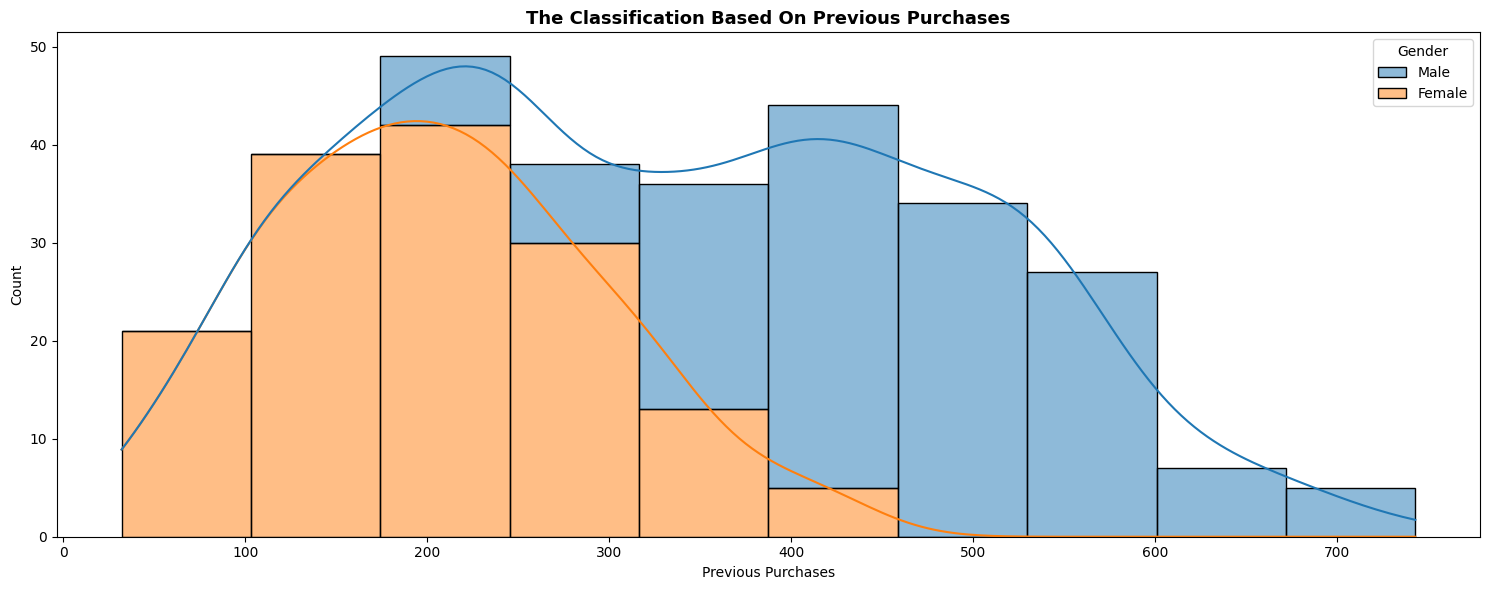

In [18]:
classifi_age=df.groupby(["Gender","Category","Item Purchased","Payment Method"]).agg({
    "Age":"mean",
    "Review Rating":"mean",
    "Previous Purchases":"sum"
}).reset_index()
classifi_age=classifi_age.sort_values("Previous Purchases",ascending=False)
classifi_age
plt.figure(figsize=(15,6))
for col in classifi_age:
    if col not in ["Gender","Category","Item Purchased","Payment Method"]:
            plt.figure(figsize=(15,6))
            sns.histplot(data=classifi_age,x=col,hue="Gender",kde=True,multiple="stack")
            plt.title(f"The Classification Based On {col}",fontweight="bold",fontsize=13)
            plt.tight_layout()
            plt.show()

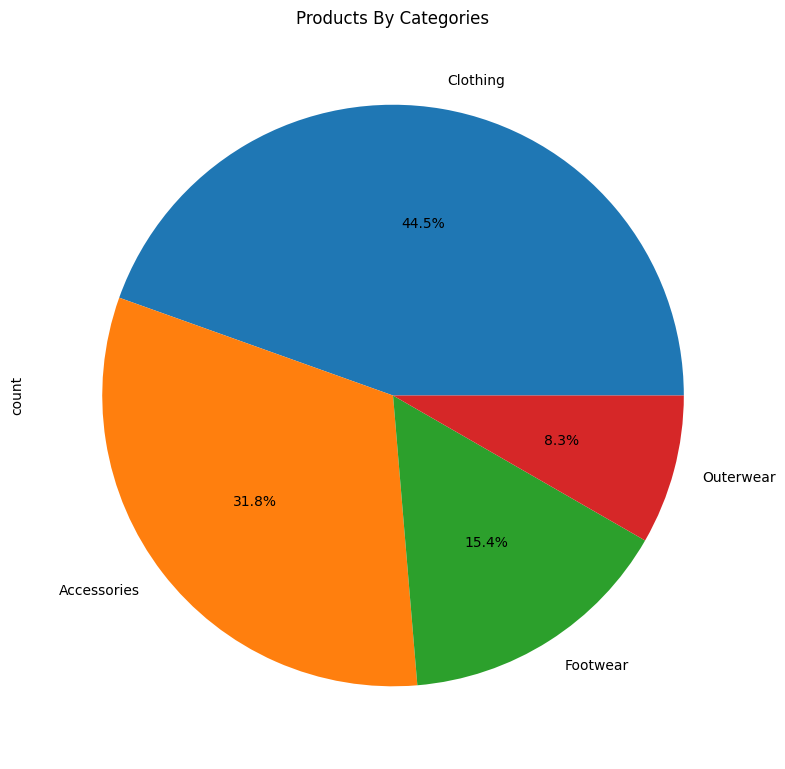

In [19]:
df["Category"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(8,8))
plt.title("Products By Categories")
plt.tight_layout()
plt.show()

### `Classification Based On Seasons,Frequency And Sales`

In [20]:
classifi_sea=df.groupby(["Gender","Item Purchased","Category","Season","Frequency of Purchases"])["Purchase Amount (USD)"].sum().reset_index()
classifi_sea


,Gender,Item Purchased,Category,Season,Frequency of Purchases,Purchase Amount (USD)
0,Female,Backpack,Accessories,Fall,Annually,55
1,Female,Backpack,Accessories,Fall,Fortnightly,147
2,Female,Backpack,Accessories,Fall,Monthly,96
3,Female,Backpack,Accessories,Fall,Quarterly,62
4,Female,Backpack,Accessories,Fall,Weekly,143
...,...,...,...,...,...,...
1260,Male,T-shirt,Clothing,Winter,Every 3 Months,423
1261,Male,T-shirt,Clothing,Winter,Fortnightly,430
1262,Male,T-shirt,Clothing,Winter,Monthly,213
1263,Male,T-shirt,Clothing,Winter,Quarterly,129


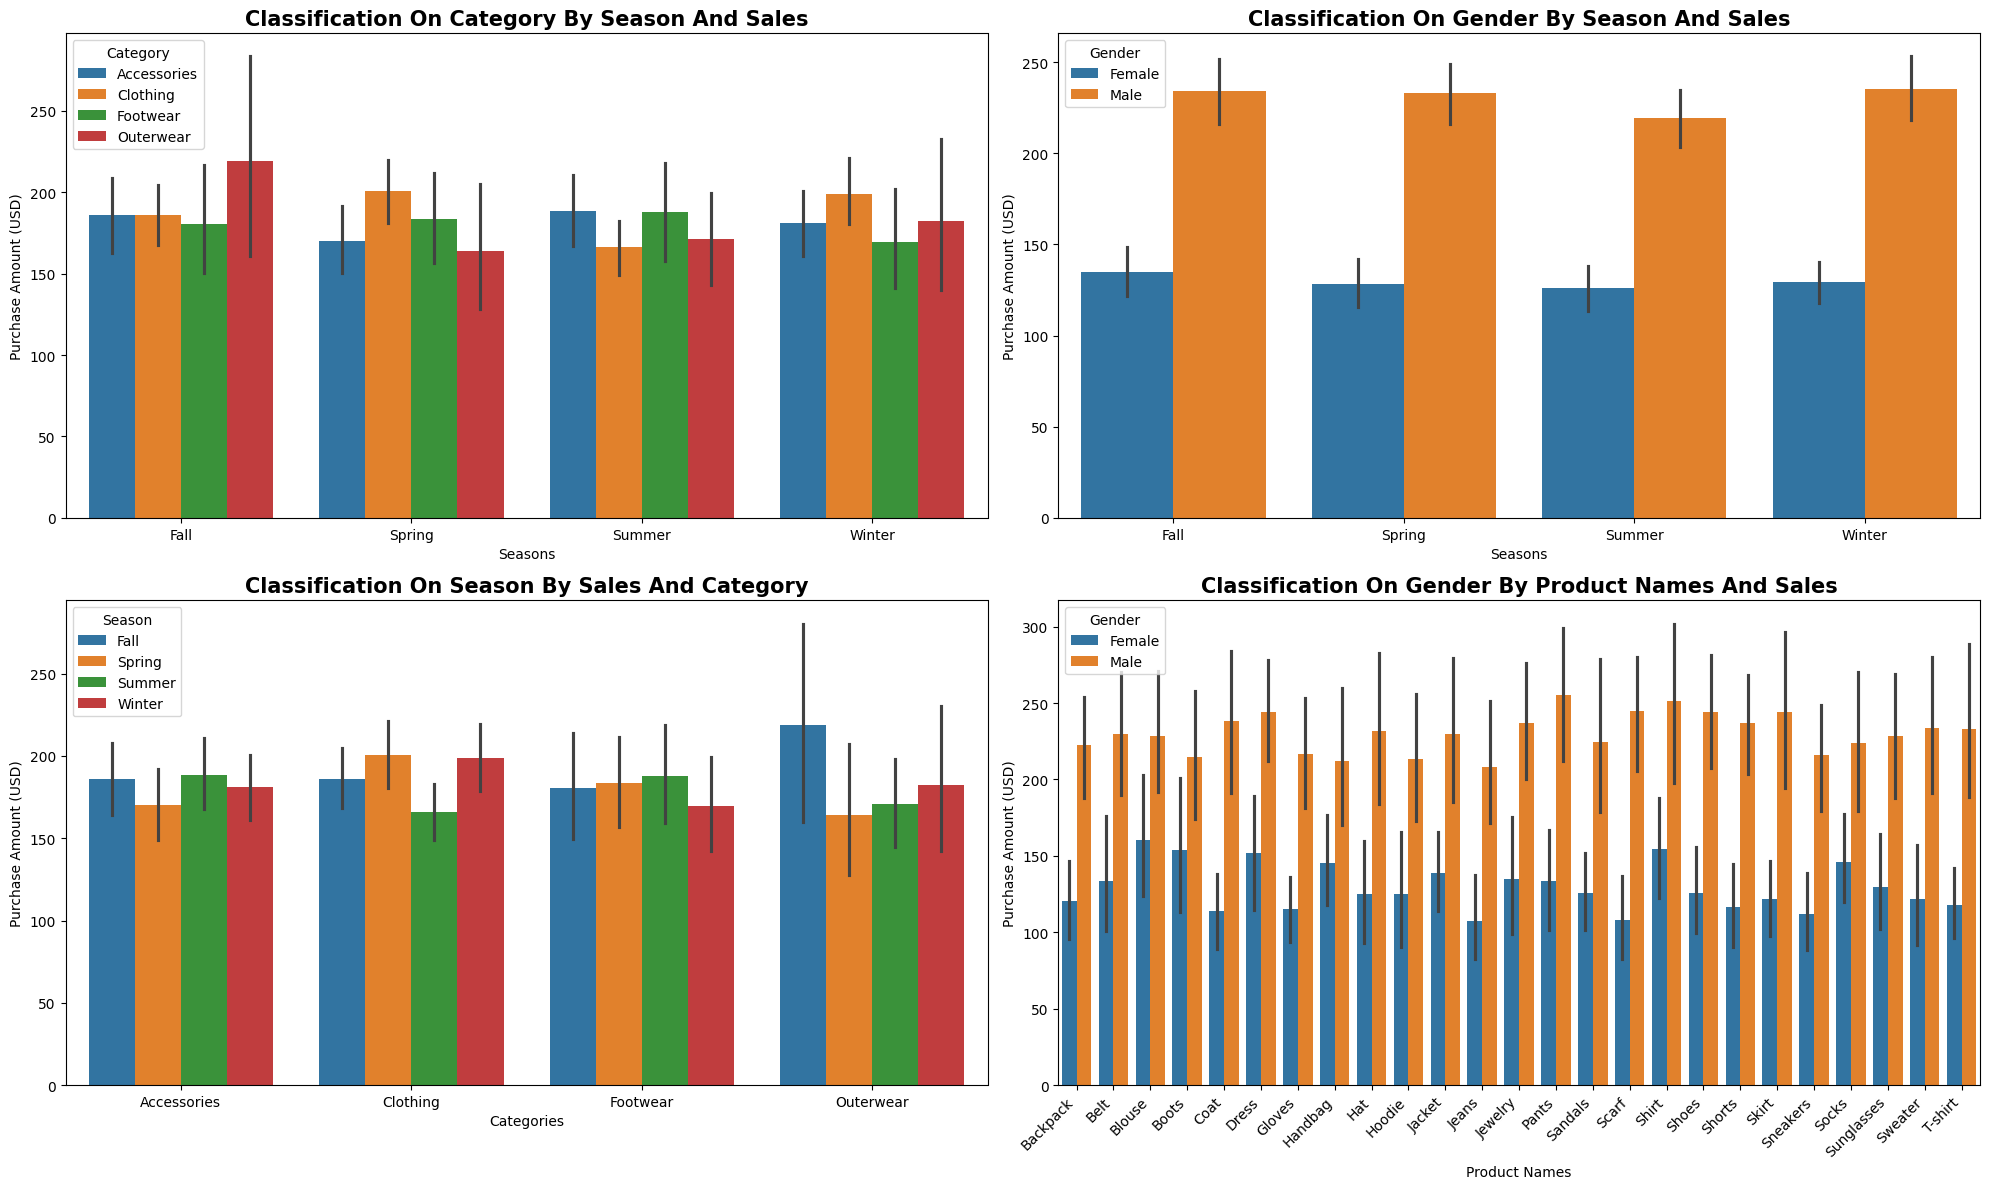

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(data=classifi_sea,x="Season",y="Purchase Amount (USD)",hue="Category")
plt.title("Classification On Category By Season And Sales",fontweight="bold",fontsize=15)
plt.xlabel("Seasons")

plt.subplot(2,2,2)
sns.barplot(data=classifi_sea,x="Season",y="Purchase Amount (USD)",hue="Gender")
plt.title("Classification On Gender By Season And Sales",fontweight="bold",fontsize=15)
plt.xlabel("Seasons")

plt.subplot(2,2,3)
sns.barplot(data=classifi_sea,x="Category",y="Purchase Amount (USD)",hue="Season")
plt.title("Classification On Season By Sales And Category",fontweight="bold",fontsize=15)
plt.xlabel("Categories")

plt.subplot(2,2,4)
sns.barplot(data=classifi_sea,x="Item Purchased",y="Purchase Amount (USD)",hue="Gender")
plt.xticks(rotation=45,ha="right")
plt.title("Classification On Gender By Product Names And Sales",fontweight="bold",fontsize=15)
plt.xlabel("Product Names")
plt.tight_layout()
plt.show()


### `Interactive Visualization`

In [22]:
import plotly.express as px

fig = px.bar(
    classifi_sea,
    x="Category",
    y="Purchase Amount (USD)",
    color="Season",
    title="Classification On Sales By Category And Season"
)
fig.show()


### `How Many People Used The Promo Code And If They Purchased Discount Applied Product Or Not And Which Age Group Is Most Likely To Apply The Codes`

In [23]:
classifi_dis=df.groupby(["Gender","Discount Applied","Promo Code Used"])["Age"].mean().reset_index()
classifi_dis.style.background_gradient(cmap="Greens")


,Gender,Discount Applied,Promo Code Used,Age
0,Female,No,No,44.007212
1,Male,No,No,44.015385
2,Male,Yes,Yes,44.144902


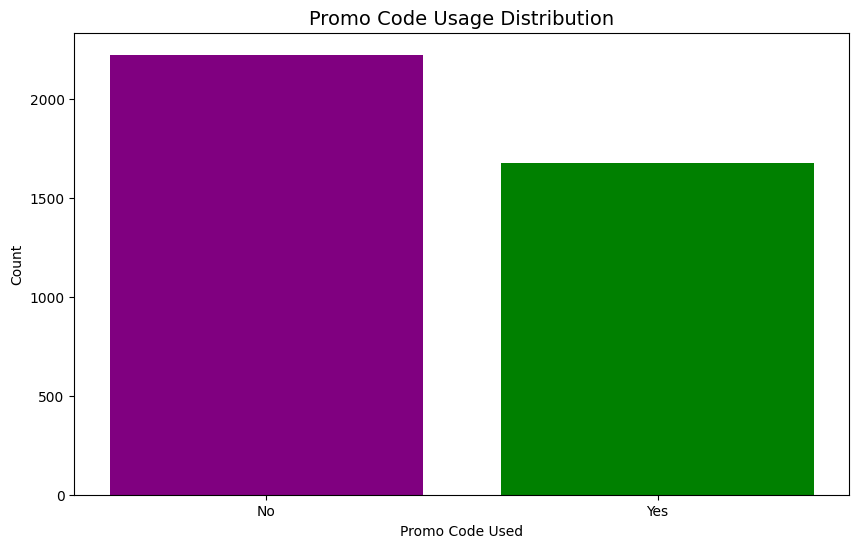

In [24]:
x=df["Promo Code Used"].value_counts().reset_index()
plt.figure(figsize=(10,6))
plt.bar(x["Promo Code Used"],x["count"],color=["Purple","Green"])
# Labels and title
plt.xlabel("Promo Code Used")
plt.ylabel("Count")
plt.title("Promo Code Usage Distribution",fontsize=14)
plt.show()


### `Relation Between Age & Ratings By Products And Categories`

In [25]:
#Products and categories by highest to lowest ratings value
classifi_ratings=df.groupby(["Gender","Item Purchased","Category"]).agg({
    "Age":"mean",
    "Review Rating":"mean"
}).sort_values("Review Rating",ascending=False).reset_index()
classifi_ratings.style.background_gradient(cmap="Reds")

,Gender,Item Purchased,Category,Age,Review Rating
0,Female,Handbag,Accessories,44.793103,4.006897
1,Male,Gloves,Accessories,41.951456,3.892233
2,Female,Sunglasses,Accessories,43.267857,3.860714
3,Female,Hoodie,Clothing,46.235294,3.858824
4,Male,Belt,Accessories,41.424528,3.844340
5,Male,Sandals,Footwear,43.108911,3.843564
6,Female,Sneakers,Footwear,42.238095,3.838095
7,Female,Sandals,Footwear,45.949153,3.837288
8,Male,Hat,Accessories,43.019608,3.837255
9,Female,Shoes,Footwear,48.895833,3.829167


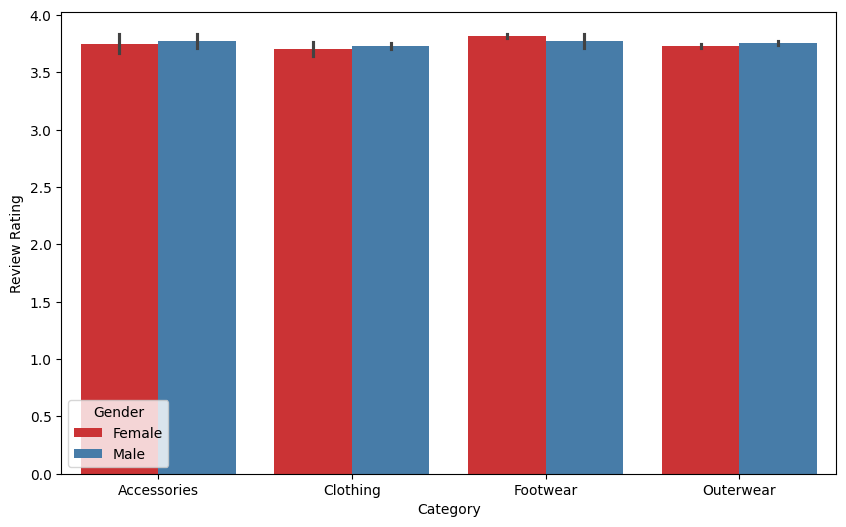

In [26]:
classifi_ratings=df.groupby(["Gender","Item Purchased","Category"]).agg({
    "Age":"mean",
    "Review Rating":"mean"
}).reset_index().sort_values("Review Rating",ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=classifi_ratings,x="Category",y="Review Rating",hue="Gender",palette="Set1")
plt.show()

### `Alternate Visualization For Better Understanding`

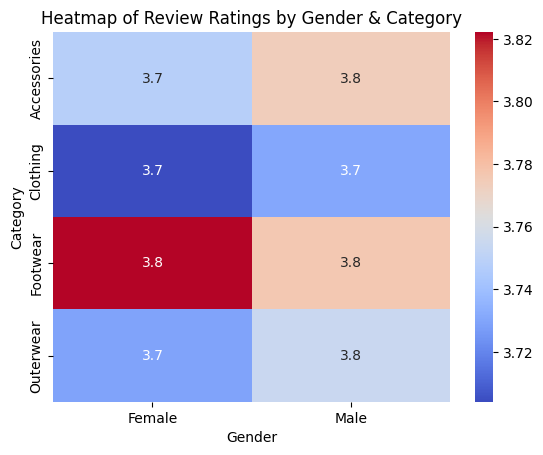

In [27]:
pivot_table = classifi_ratings.pivot_table(index="Category", columns="Gender", values="Review Rating")
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Heatmap of Review Ratings by Gender & Category")
plt.show()


### `Which Clothing Colour People Buys The Most`

In [28]:
x=df[df["Category"]=="Clothing"]
classifi_co = x.groupby(["Gender", "Color"]).size().reset_index(name="Count")
classifi_co.sort_values("Count",ascending=False).style.background_gradient(cmap="Blues")

,Gender,Color,Count
45,Male,Teal,57
33,Male,Green,57
47,Male,Violet,56
37,Male,Maroon,55
44,Male,Silver,54
30,Male,Cyan,53
42,Male,Purple,50
39,Male,Orange,50
29,Male,Charcoal,49
40,Male,Peach,48


#### *<p style="color:Orange;">As we can see Teal,Green,Violet and Maroon in the Male Category and Black,Pink,Orange,Maroon and Teal in the Feamle category, are the most poplar colours among customers when it comes to clothing category.*

In [29]:
x=df[df["Category"]=="Accessories"]
classifi_col=x.groupby(["Gender","Color"]).size().reset_index(name="Count")
classifi_col.sort_values("Count",ascending=False).style.background_gradient(cmap="Greens")


,Gender,Color,Count
38,Male,Olive,48
32,Male,Gray,41
26,Male,Black,39
29,Male,Charcoal,39
49,Male,Yellow,39
44,Male,Silver,38
46,Male,Turquoise,38
43,Male,Red,37
40,Male,Peach,37
34,Male,Indigo,37


#### *<p style="color:Orange;">As we can see Olive,Gray,Black,Charcoal and Yellow in the Male Category and Green,Blue,Magenta,Peach and Lavender in the Feamle category, are the most poplar colours among customers when it comes to Accessories category.*

In [30]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [31]:
x=df[df["Category"]=="Footwear"]
classifi_colo=x.groupby(["Gender","Color"]).size().reset_index(name="Count")
classifi_colo.sort_values("Count",ascending=False).style.background_gradient(cmap="Purples")

,Gender,Color,Count
38,Male,Olive,21
47,Male,Violet,21
45,Male,Teal,20
30,Male,Cyan,20
31,Male,Gold,19
34,Male,Indigo,19
33,Male,Green,19
26,Male,Black,18
41,Male,Pink,18
49,Male,Yellow,18


#### *<p style="color:Orange;">As we can see Olive,Violet,Teal & Cyan in the Male Category and Gray,Brown,Silver & Blue in the Feamle category, are the most poplar colours among customers when it comes to Footwear category.*

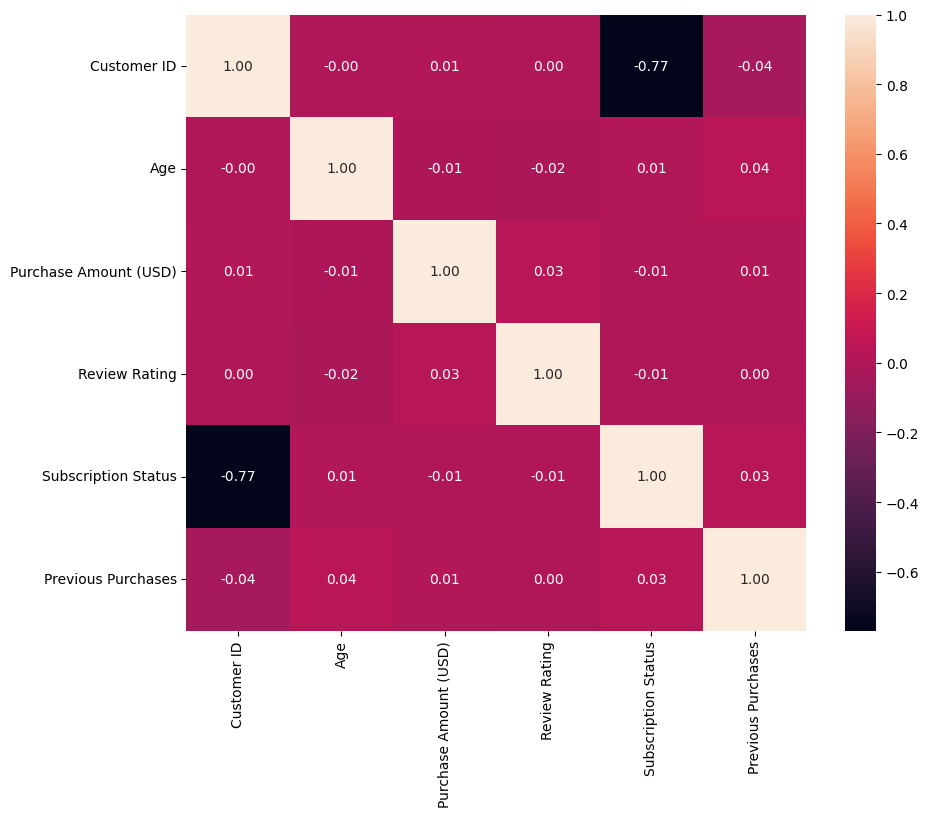

In [32]:
dt=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,8))
sns.heatmap(dt,annot=True,fmt=".2f")
plt.show()


## <p style="color:Orange;">🧠 Overall Story
### **The dataset like a detective at a scene — first surveying the territory, then cleaning and preparing the clues. I used descriptive statistics to sketch the customer portrait, visual tools to uncover behavioral trends, and segmentation to hint at actionable insights. By the end, my analysis paints a picture of who the customers are, what they buy, when, and how much they spend — a full-cycle customer intelligence report.**